# IDEA: the biking time of customers tend to be less than the biking time of subscribers, since subscribers need to pay the membership fee to citibike while customers are just one time payment

## Null Hypothesis: The average trip duration of subscribers biking are equal to the average trip duration of non-subscribers 
### _$H_0$_: $\frac{T_{\mathrm{subscriber}}}{S_{\mathrm{total}}} = \frac{T_{\mathrm{customer}}}{C_{\mathrm{total}}}$
### _$H_1$_ : $\frac{T_{\mathrm{subscriber}}}{S_{\mathrm{total}}} \neq \frac{T_{\mathrm{customer}}}{C_{\mathrm{total}}}$

or identically:

### _$H_0$_:   $avg_{Strip} = avg_{Ctrip}$
### _$H_1$_:   $avg_{Strip} \neq  avg_{Ctrip}$

### significance level  $\alpha=0.05$

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import os
import scipy.stats

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/_matplotlibrc.json") )
#pl.rcParams.update(s)

In [3]:
os.getenv('PUIDATA')

'/nfshome/pl1840/PUIdata'

In [4]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [5]:
datestring = '201801'
getCitiBikeCSV(datestring)

file in place, you can continue


In [6]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992,1,2018-01-01 02:06:17.541
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969,2,2018-01-01 12:06:18.039
2,510,2018-01-01 12:06:56.9780,2018-01-01 12:15:27.8100,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,Subscriber,1946,1,2018-01-01 12:06:56.978
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994,1,2018-01-01 14:53:10.186
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991,1,2018-01-01 17:34:30.192


In [7]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [8]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude','birth year', 'gender'],
       axis=1, inplace=True)

In [9]:
df.head()

,tripduration,bikeid,usertype,date
0,932,31929,Subscriber,2018-01-01 02:06:17.541
1,550,31845,Subscriber,2018-01-01 12:06:18.039
2,510,31708,Subscriber,2018-01-01 12:06:56.978
3,354,31697,Subscriber,2018-01-01 14:53:10.186
4,250,31861,Subscriber,2018-01-01 17:34:30.192


In [11]:
totaldf=df[['tripduration','usertype']]
usertype={'Subscriber':1, 'Customer':2}
totaldf['Usertype']=totaldf['usertype'].map(str).map(usertype)
totaldf.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tripduration,usertype,Usertype
0,932,Subscriber,1
1,550,Subscriber,1
2,510,Subscriber,1
3,354,Subscriber,1
4,250,Subscriber,1


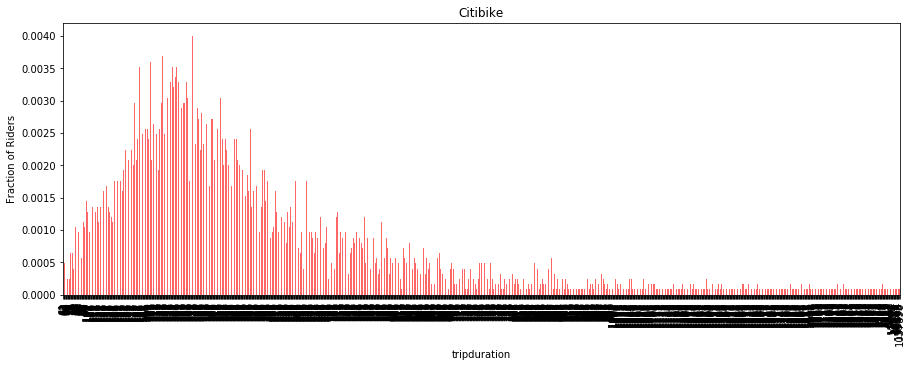

In [12]:
tcount = totaldf['Usertype'].value_counts() 
SubtripCount = (totaldf['tripduration'][totaldf['Usertype'] == 1].groupby([totaldf['tripduration']]).count())/tcount[1]
#Custripcount = (totaldf['tripduration'][totaldf['Usertype'] == 2].groupby([totaldf['tripduration']]).count())/tcount[2]

fig = figsize(15,5)
SubtripCount.plot(kind="bar", color = 'r', alpha=.6)
#CustripCount.plot(kind="bar", color = 'c', alpha=.5)
pl.xlabel('tripduration')
pl.ylabel('Fraction of Riders')
pl.title('Citibike');

**Figure 1.** shows the normalized distribution of tripduration by usertype=subscriber. The distribution is left skewed after normalized.

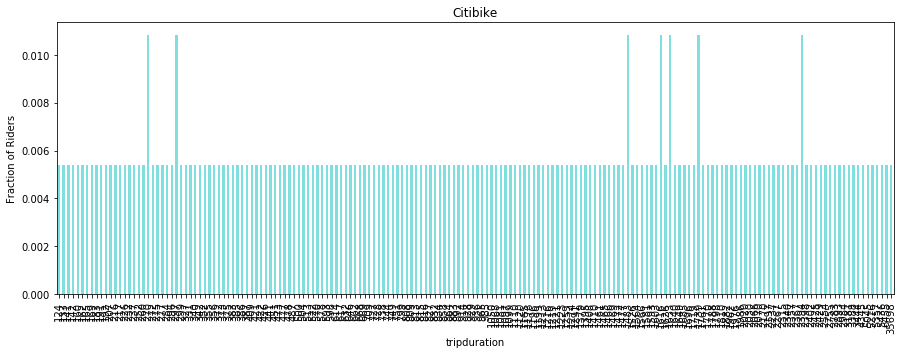

In [13]:
tcount = totaldf['Usertype'].value_counts() 
#SubtripCount = (totaldf['tripduration'][totaldf['Usertype'] == 1].groupby([totaldf['tripduration']]).count())/tcount[1]
CustripCount = (totaldf['tripduration'][totaldf['Usertype'] == 2].groupby([totaldf['tripduration']]).count())/tcount[2]

fig = figsize(15,5)
#SubtripCount.plot(kind="bar", color = 'r', alpha=.6)
CustripCount.plot(kind="bar", color = 'c', alpha=.5)
pl.xlabel('tripduration')
pl.ylabel('Fraction of Riders')
pl.title('Citibike');

**Figure 2.** shows the normalized distribution of tripduration by usertype=customer. This distribution is not normally distributed.

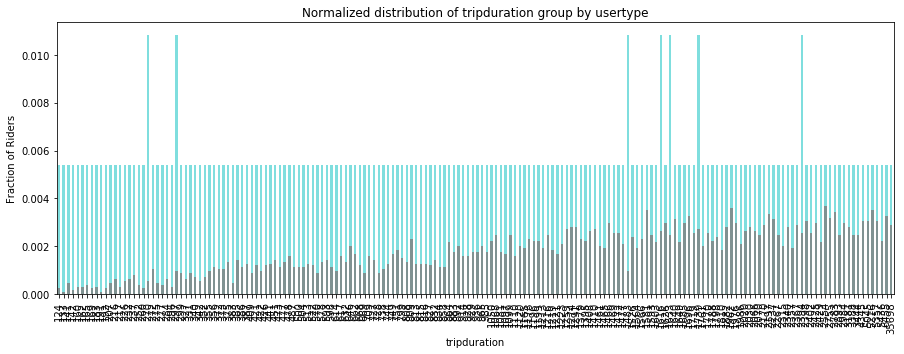

In [31]:
tcount = totaldf['Usertype'].value_counts() 
SubtripCount = (totaldf['tripduration'][totaldf['Usertype'] == 1].groupby([totaldf['tripduration']]).count())/tcount[1]
CustripCount = (totaldf['tripduration'][totaldf['Usertype'] == 2].groupby([totaldf['tripduration']]).count())/tcount[2]

fig = figsize(15,5)
SubtripCount.plot(kind="bar", color = 'r', alpha=.6)
CustripCount.plot(kind="bar", color = 'c', alpha=.5)
pl.xlabel('tripduration')
pl.ylabel('Fraction of Riders')
pl.title('Normalized distribution of tripduration group by usertype');

**Figure 3.** shows the normalized distribution of tripduration by usertype. The combined distribution is not normally distributed.

In [10]:
dfavg=df.groupby('usertype', as_index=False).tripduration.mean()
dfavg

,usertype,tripduration
0,Customer,1431.081081
1,Subscriber,519.991435


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


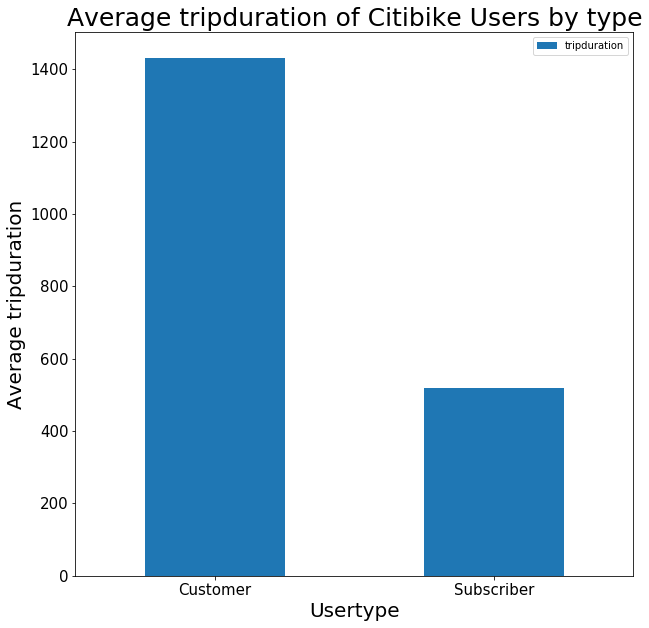

In [15]:
fig = figsize(10,10)
dfavg['usertype'][1] = 'Subscriber' 
dfavg['usertype'][2] = 'Customer'
dfavg.plot(x='usertype',y='tripduration', kind='bar', fontsize=15, rot=0);
pl.xlabel('Usertype', fontsize=20)
pl.ylabel('Average tripduration', fontsize=20)
pl.title('Average tripduration of Citibike Users by type', fontsize=25);

**Figure 4.** shows the average trip duration of Citibike users separated by usertype. These numbers will be used to determine whether there is a significant difference between the avaerage trip duration of users based on usertype.

In [16]:
print(totaldf['tripduration'][totaldf['Usertype'] == 1].describe())
s = totaldf['tripduration'][totaldf['Usertype'] == 1]

count    1.249200e+04
mean     5.199914e+02
std      9.444910e+03
min      6.100000e+01
25%      2.157500e+02
50%      3.020000e+02
75%      4.600000e+02
max      1.037896e+06
Name: tripduration, dtype: float64


In [17]:
print(totaldf['tripduration'][totaldf['Usertype'] == 2].describe())
c = totaldf['tripduration'][totaldf['Usertype'] == 2]

count      185.000000
mean      1431.081081
std       2750.787081
min        124.000000
25%        426.000000
50%        965.000000
75%       1685.000000
max      35698.000000
Name: tripduration, dtype: float64


**Statistical analysis**
Since the data I collected is not normally distribued, so I cannot use t-test to test the difference between means of samples. So I use Mann-Whitney U test to test the null hypothesis. Mann-Whitney U test does not required sample data to be normally distributed and it is nearly as efficient as the t-test on normal distributions.

In [18]:
scipy.stats.mannwhitneyu(s, c)

MannwhitneyuResult(statistic=429946.5, pvalue=4.0914810195345476e-49)

**Conclusion:** Based on the results of the Mann-Whitney U test, which returned an extremely small p-value and a test statistic of 429946.5, we can reject our null-hypothesis at 0.05 significance level and assert that there is a significant difference between the average trip duration of subscribers and customers Citi Bike users

## Check the robustness of my conclusion above with another citibbike dataset

In [19]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [20]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df1['date'] = pd.to_datetime(df1['starttime'])
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [21]:
df1.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude','birth year', 'gender'],
       axis=1, inplace=True)

In [23]:
totaldf1=df1[['tripduration','usertype']]
usertype={'Subscriber':1, 'Customer':2}
totaldf1['Usertype']=totaldf['usertype'].map(str).map(usertype)
totaldf1.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tripduration,usertype,Usertype
0,1346,Subscriber,1.0
1,363,Subscriber,1.0
2,346,Subscriber,1.0
3,182,Subscriber,1.0
4,969,Subscriber,1.0


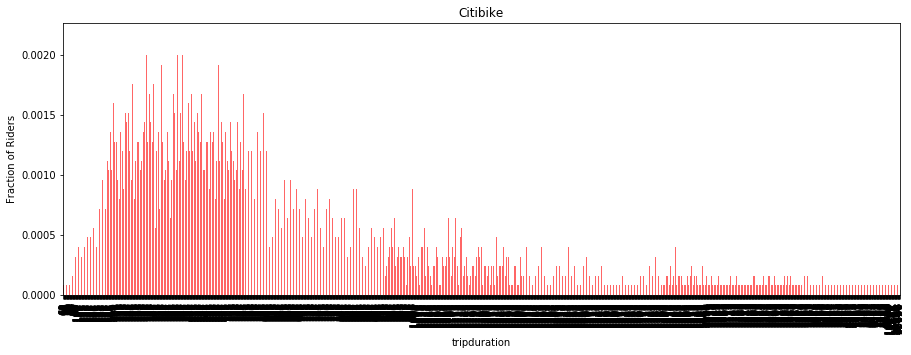

In [24]:
tcount = totaldf1['Usertype'].value_counts() 
SubtripCount = (totaldf1['tripduration'][totaldf1['Usertype'] == 1].groupby([totaldf1['tripduration']]).count())/tcount[1]
#CustripCount = (totaldf['tripduration'][totaldf['Usertype'] == 2].groupby([totaldf['tripduration']]).count())/tcount[2]

fig = figsize(15,5)
SubtripCount.plot(kind="bar", color = 'r', alpha=.6)
#CustripCount.plot(kind="bar", color = 'c', alpha=.5)
pl.xlabel('tripduration')
pl.ylabel('Fraction of Riders')
pl.title('Citibike');

**Figure 5.** shows the normalized distribution of tripduration by usertype=subscriber. The distribution is left skewed after normalized.

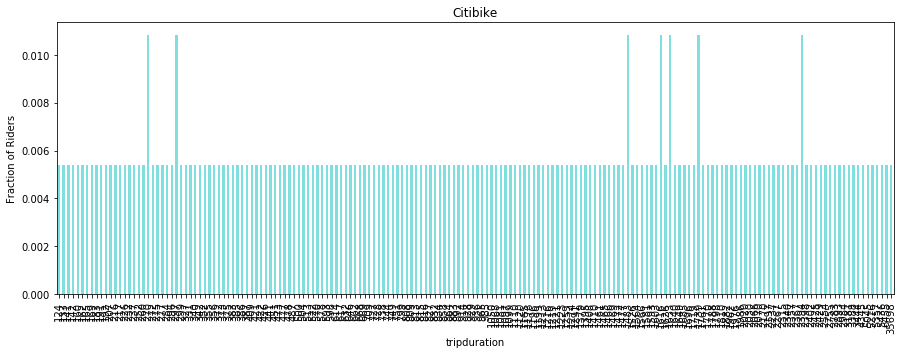

In [25]:
tcount = totaldf1['Usertype'].value_counts() 
#SubtripSum = (totaldf['tripduration'][totaldf['Usertype'] == 1].groupby([totaldf['tripduration']]).sum())/tcount[1]
CustripSum = (totaldf1['tripduration'][totaldf1['Usertype'] == 2].groupby([totaldf1['tripduration']]).sum())/tcount[2]

fig = figsize(15,5)
#SubtripCount.plot(kind="bar", color = 'r', alpha=.6)
CustripCount.plot(kind="bar", color = 'c', alpha=.5)
pl.xlabel('tripduration')
pl.ylabel('Fraction of Riders')
pl.title('Citibike');

**Figure 6.** shows the normalized distribution of tripduration by usertype=customer. This distribution is not normally distributed.

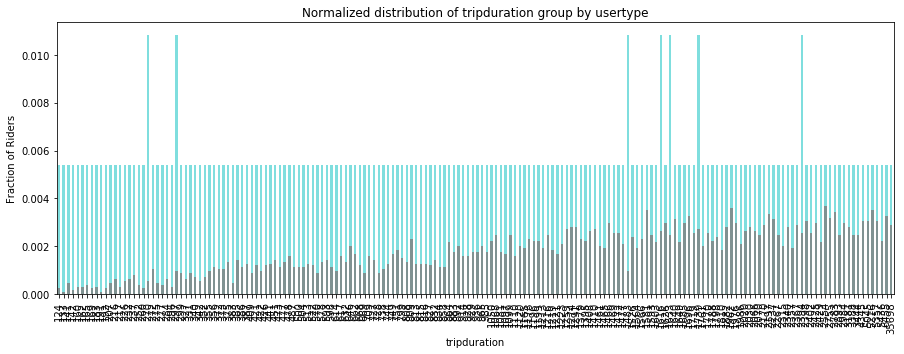

In [32]:
tcount = totaldf1['Usertype'].value_counts() 
SubtripSum = (totaldf1['tripduration'][totaldf1['Usertype'] == 1].groupby([totaldf1['tripduration']]).sum())/tcount[1]
CustripSum = (totaldf1['tripduration'][totaldf1['Usertype'] == 2].groupby([totaldf1['tripduration']]).sum())/tcount[2]

fig = figsize(15,5)
SubtripCount.plot(kind="bar", color = 'r', alpha=.6)
CustripCount.plot(kind="bar", color = 'c', alpha=.5)
pl.xlabel('tripduration')
pl.ylabel('Fraction of Riders')
pl.title('Normalized distribution of tripduration group by usertype');

**Figure 7.** shows the normalized distribution of tripduration by usertype. The combined distribution is not normally distributed.

In [22]:
df1avg=df.groupby('usertype', as_index=False).tripduration.mean()
df1avg

,usertype,tripduration
0,Customer,1431.081081
1,Subscriber,519.991435


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


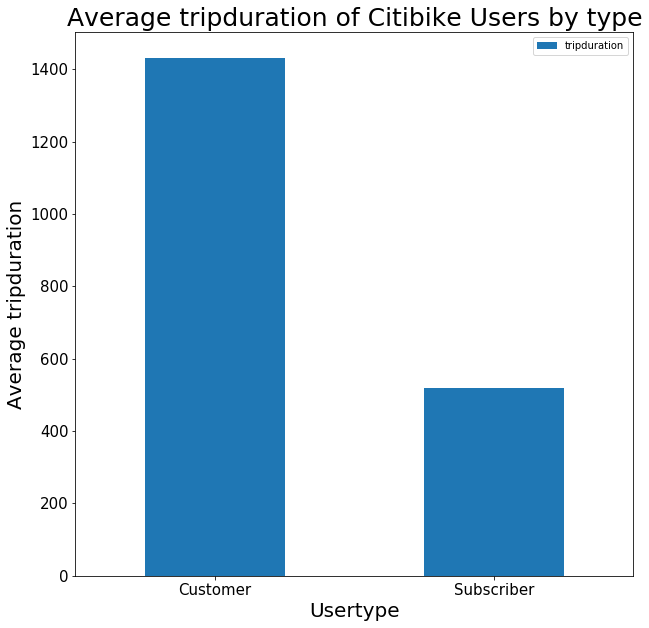

In [27]:
fig = figsize(10,10)
df1avg['usertype'][1] = 'Subscriber' 
df1avg['usertype'][2] = 'Customer'
df1avg.plot(x='usertype',y='tripduration', kind='bar', fontsize=15, rot=0);
pl.xlabel('Usertype', fontsize=20)
pl.ylabel('Average tripduration', fontsize=20)
pl.title('Average tripduration of Citibike Users by type', fontsize=25);

**Figure 8.** shows the average trip duration of Citibike users separated by usertype. These numbers will be used to determine whether there is a significant difference between the avaerage trip duration of users based on usertype.

In [28]:
print(totaldf1['tripduration'][totaldf1['Usertype'] == 1].describe())
s1 = totaldf1['tripduration'][totaldf1['Usertype'] == 1]

count    12492.000000
mean       779.848783
std       1203.416722
min         60.000000
25%        335.000000
50%        530.000000
75%        879.000000
max      42101.000000
Name: tripduration, dtype: float64


In [29]:
print(totaldf1['tripduration'][totaldf1['Usertype'] == 2].describe())
c1 = totaldf1['tripduration'][totaldf1['Usertype'] == 2]

count     185.000000
mean      649.854054
std       515.472826
min        75.000000
25%       282.000000
50%       461.000000
75%       907.000000
max      3164.000000
Name: tripduration, dtype: float64


In [30]:
scipy.stats.mannwhitneyu(s1, c1)

MannwhitneyuResult(statistic=1064606.0, pvalue=0.032907007201970921)

**Conclusion:** Based on the results of the Mann-Whitney U test, which returned a p-value of 0.033 and a test statistic of 1064606, we can reject our null-hypothesis at 0.05 significance level and assert that there is a significant difference between the average trip duration of subscribers and customers Citi Bike users